#Load dataset

In [3]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
df['age'].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

#Cleaning Data (Handling missing value)

In [7]:
df =df.drop_duplicates()

In [8]:
df = df.reset_index(drop = True)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
print(df['hypertension'].isnull().sum())
print(df['heart_disease'].isnull().sum())
print(df['ever_married'].isnull().sum())

0
0
0


In [9]:
from collections import Counter
# print(Counter(df['gender']))
# print(Counter(df['stroke']))
print(Counter(df['hypertension']))
print(Counter(df['heart_disease']))
print(Counter(df['ever_married']))

Counter({0: 4612, 1: 498})
Counter({0: 4834, 1: 276})
Counter({'Yes': 3353, 'No': 1757})


In [10]:
#drop other from gender
other = df[df['gender'] == 'Other'].index
df.drop(other, axis=0, inplace= True)

In [11]:
# print(Counter(df['gender']))
print(Counter(df['hypertension']))
print(Counter(df['heart_disease']))
print(Counter(df['ever_married']))

Counter({0: 4611, 1: 498})
Counter({0: 4833, 1: 276})
Counter({'Yes': 3353, 'No': 1756})


In [12]:
#menambahkan nilai rata-rata pada kolom BMI yang memiliki nilai NaN
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [13]:
#melihat kolom yang memiliki nilai NA
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#Visualization data

In [14]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

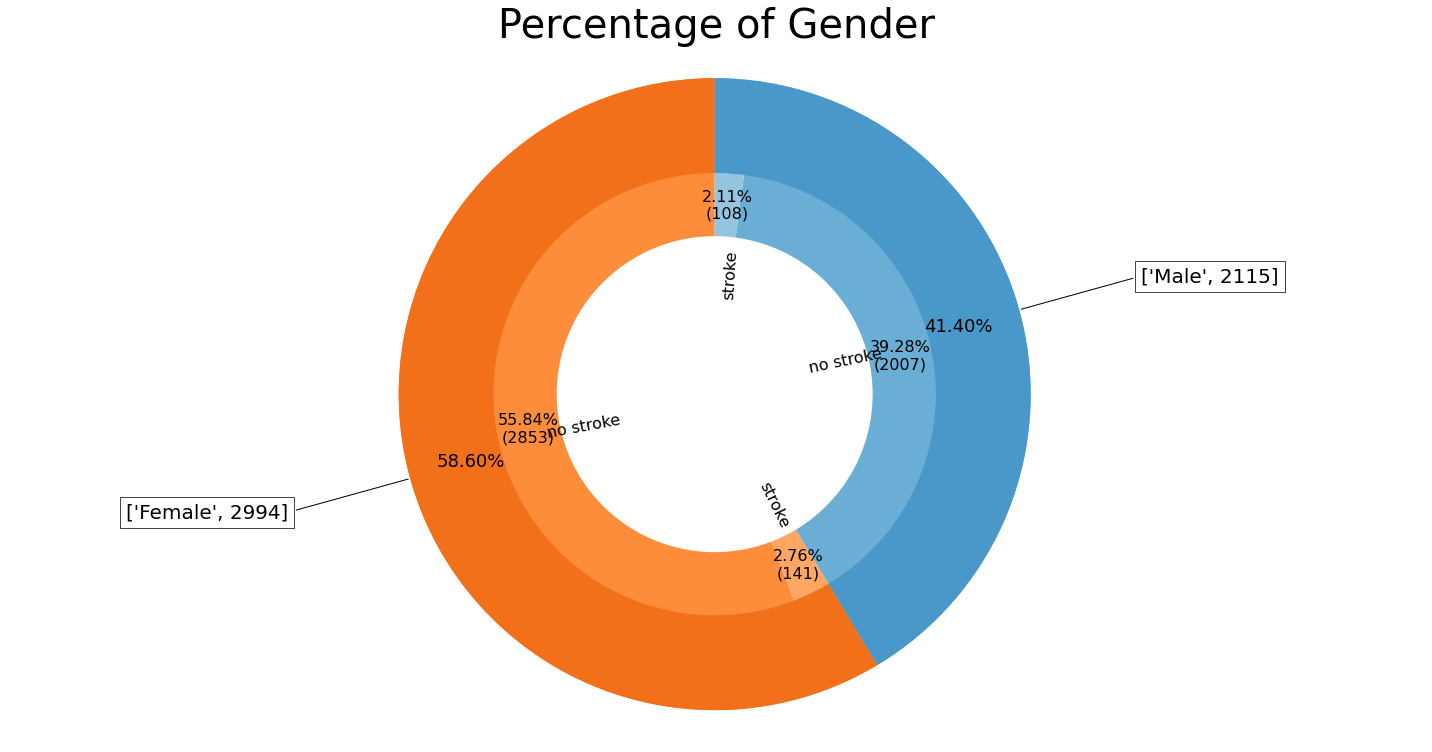

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20, 10))

# Data to plot
sizes = df['gender'].value_counts()
labels = ['Female', 'Male']
labels_decision = ['no stroke','stroke','no stroke','stroke']
# sizes1 = df[['gender','stroke']].value_counts()
sizes1=[2853,141,2007,108]
a, b=[plt.cm.Oranges, plt.cm.Blues]
colors= [a(0.6), b(0.6)]
colors_gender = [a(0.5), a(0.4), b(0.5), b(0.4)]
# explode = (0.2,0.2,0.2,0.2) 
# explode_gender = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

#Plot
pie2= ax.pie(sizes1, labels=labels_decision,colors=colors_gender,startangle=90,wedgeprops=dict(width=0.5), autopct=make_autopct(sizes1), pctdistance=0.6, labeldistance=0.3, textprops={'fontsize': 16},rotatelabels=270)

wedges, texts,t = ax.pie(sizes, startangle=90,wedgeprops=dict(width=0.3),colors=colors,autopct='%.2f%%', pctdistance=0.8, textprops={'fontsize': 18})
#Draw circle
# centre_circle = plt.Circle((0,0),3,color='black', fc='white',linewidth=0)
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)


bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate([labels[i],sizes[i]], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw, size=20)

# plt.legend(loc=(0.9, 0.1))
# handles, labels = ax.get_legend_handles_labels()

# ax.legend(handles[2:], subgroup_names_legs, loc=(0.9, 0.6))

# plt.setp(pie2[1], rotation_mode="anchor", ha="center", va="center")
# for tx in pie2[1]:
#     rot = tx.get_rotation()
#     tx.set_rotation(rot+90+(1-rot//180)*180)

plt.axis('equal')
plt.tight_layout()
plt.title('Percentage of Gender', size=40)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

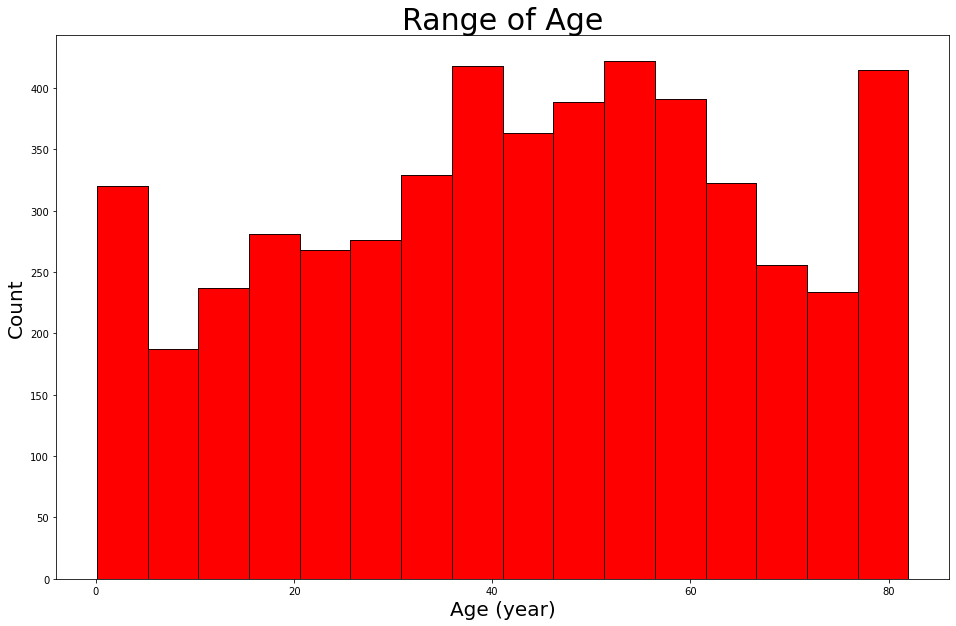

In [ ]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (16, 10))

# matplotlib histogram
plt.hist(df['age'], color = 'red', edgecolor = 'black',
         bins = int(80/5))

# seaborn histogram
sns.distplot(df['age'], hist=True, kde=False, 
             bins=int(80/5), color = 'red',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Range of Age', size = 30)
plt.xlabel('Age (year)', size =20)
plt.ylabel('Count', size = 20)

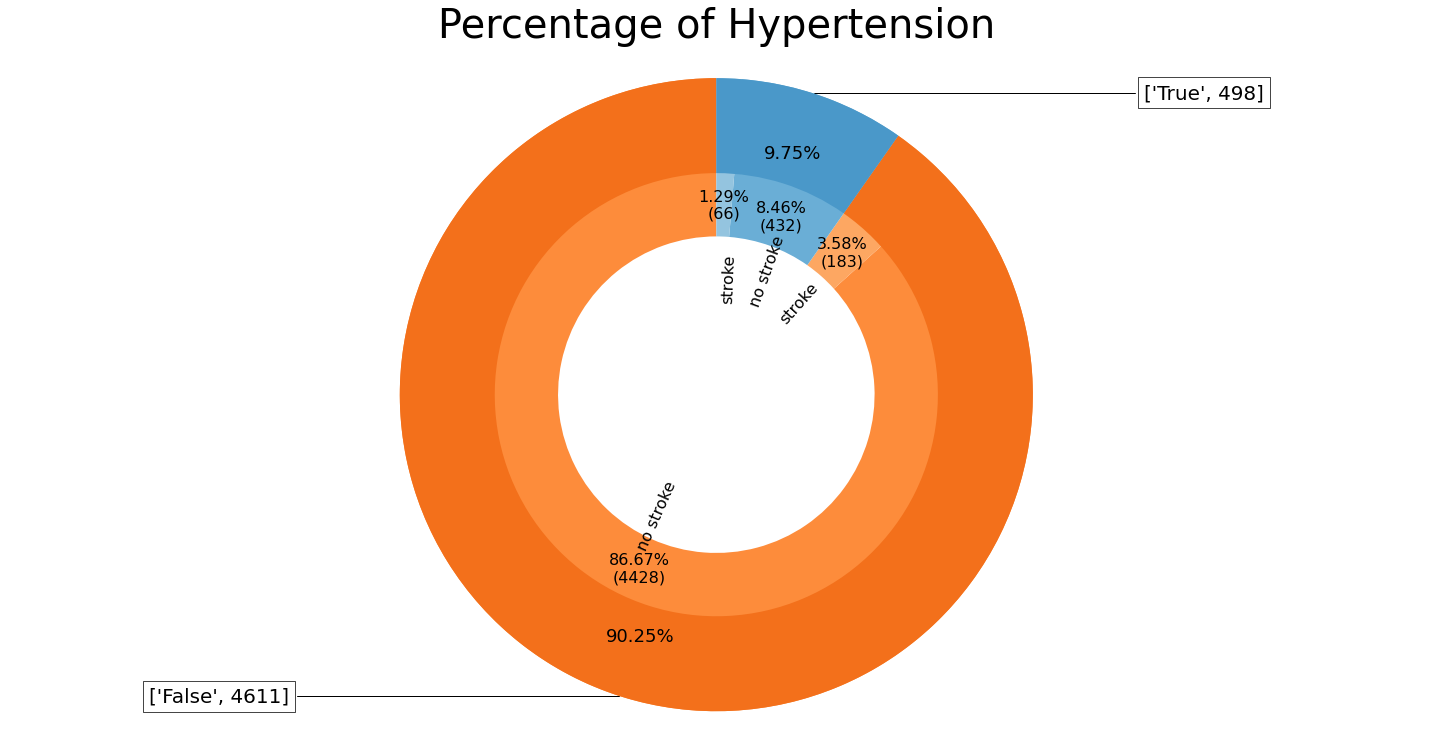

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20, 10))

# Data to plot
sizes = df['hypertension'].value_counts()
labels = ['False', 'True']
labels_decision = ['no stroke','stroke','no stroke','stroke']
# sizes1 = df[['gender','stroke']].value_counts()
sizes1=[4428,183,432,66]
a, b=[plt.cm.Oranges, plt.cm.Blues]
colors= [a(0.6), b(0.6)]
colors_gender = [a(0.5), a(0.4), b(0.5), b(0.4)]
# explode = (0.2,0.2,0.2,0.2) 
# explode_gender = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

#Plot
pie2= ax.pie(sizes1, labels=labels_decision,colors=colors_gender,startangle=90,wedgeprops=dict(width=0.5), autopct=make_autopct(sizes1), pctdistance=0.6, labeldistance=0.29, textprops={'fontsize': 16},rotatelabels=270)

wedges, texts,t = ax.pie(sizes, startangle=90,wedgeprops=dict(width=0.3),colors=colors,autopct='%.2f%%', pctdistance=0.8, textprops={'fontsize': 18})


bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate([labels[i],sizes[i]], xy=(x, y), xytext=(1.35*np.sign(x), 1*y),
                horizontalalignment=horizontalalignment, **kw, size=20)


plt.axis('equal')
plt.tight_layout()
plt.title('Percentage of Hypertension', size=40)
plt.show()


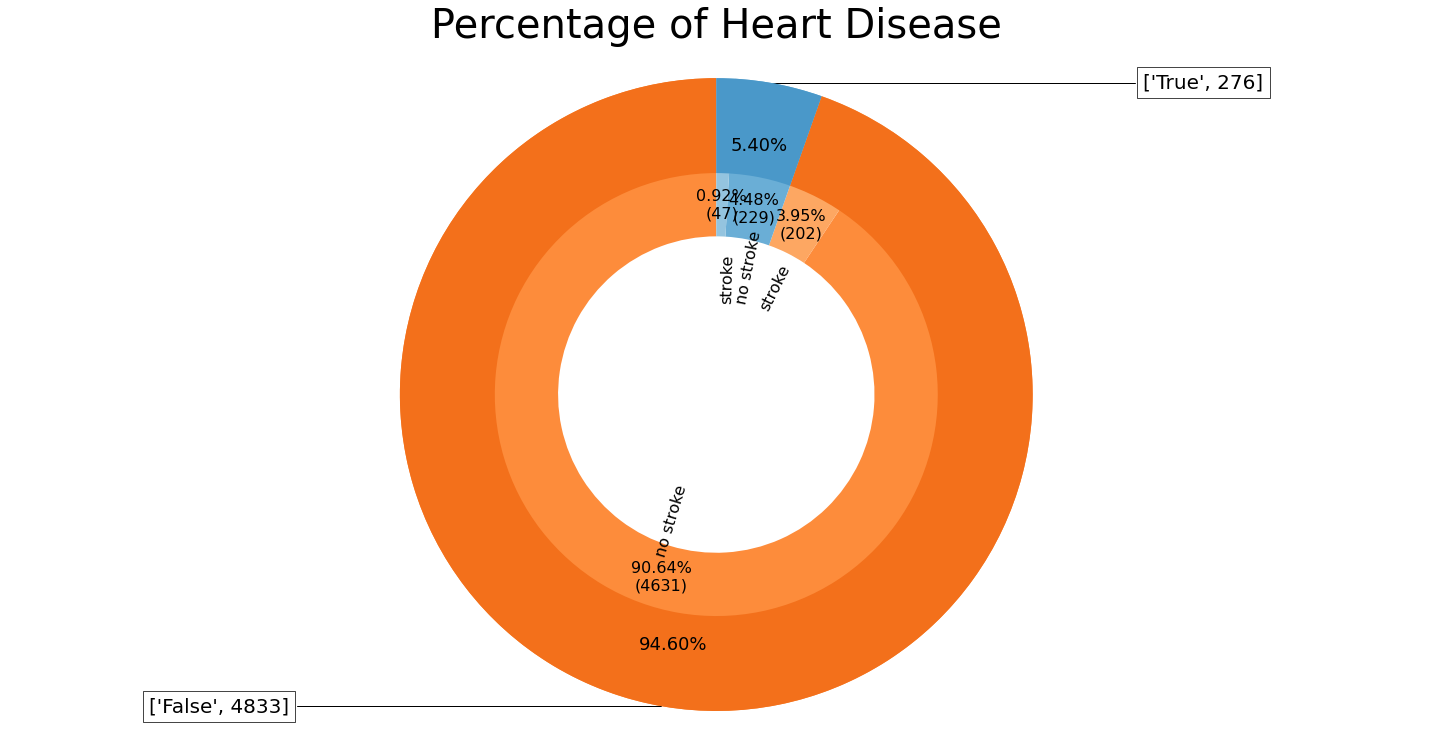

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20, 10))

# Data to plot
sizes = df['heart_disease'].value_counts()
labels = ['False', 'True']
labels_decision = ['no stroke','stroke','no stroke','stroke']

sizes1=[4631,202,229,47]
a, b=[plt.cm.Oranges, plt.cm.Blues]
colors= [a(0.6), b(0.6)]
colors_gender = [a(0.5), a(0.4), b(0.5), b(0.4)]
# explode = (0.2,0.2,0.2,0.2) 
# explode_gender = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

#Plot
pie2= ax.pie(sizes1, labels=labels_decision,colors=colors_gender,startangle=90,wedgeprops=dict(width=0.5), autopct=make_autopct(sizes1), pctdistance=0.6, labeldistance=0.29, textprops={'fontsize': 16},rotatelabels=270)

wedges, texts,t = ax.pie(sizes, startangle=90,wedgeprops=dict(width=0.3),colors=colors,autopct='%.2f%%', pctdistance=0.8, textprops={'fontsize': 18})

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate([labels[i],sizes[i]], xy=(x, y), xytext=(1.35*np.sign(x), 1*y),
                horizontalalignment=horizontalalignment, **kw, size=20)


plt.axis('equal')
plt.tight_layout()
plt.title('Percentage of Heart Disease', size=40)
plt.show()


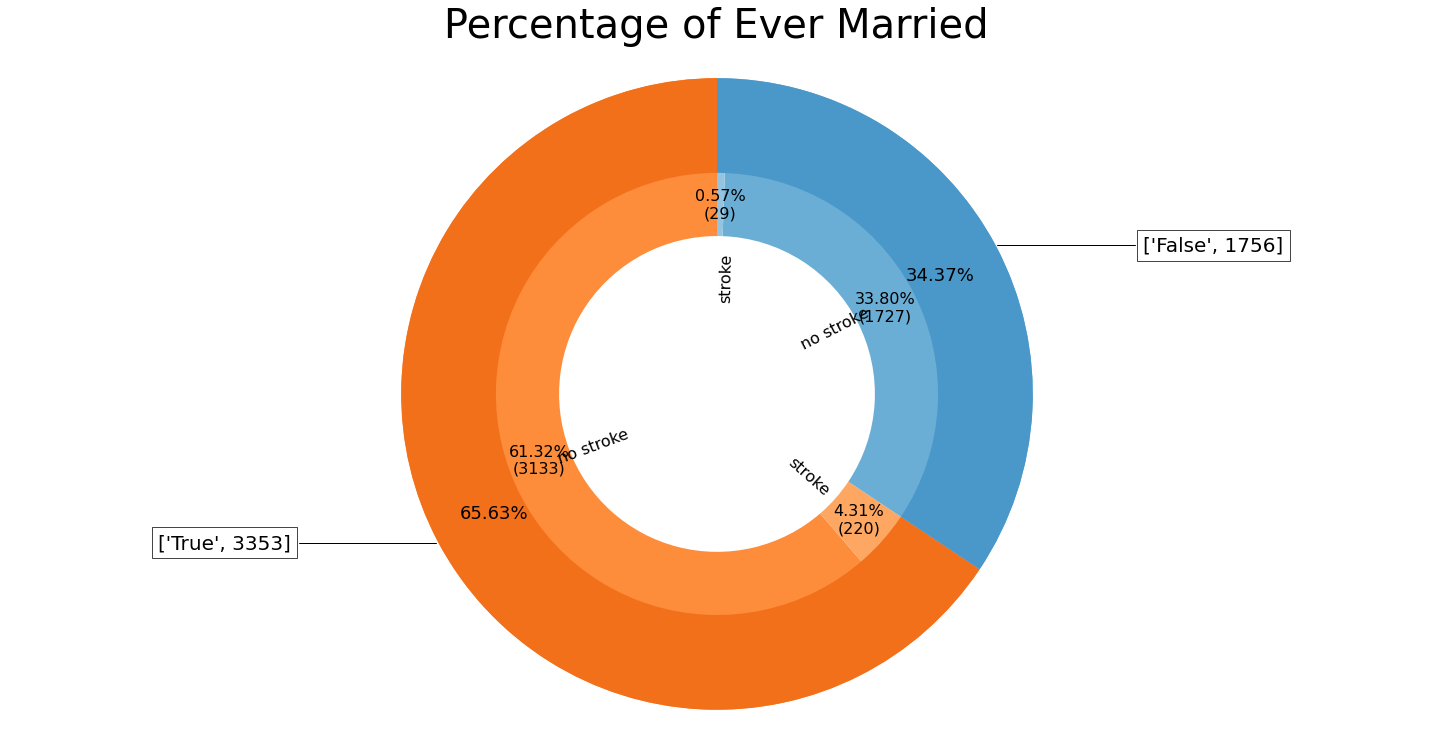

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20, 10))

# Data to plot
sizes = df['ever_married'].value_counts()
labels = ['True', 'False']
labels_decision = ['no stroke','stroke','no stroke','stroke']

sizes1=[3133,220,1727,29]
a, b=[plt.cm.Oranges, plt.cm.Blues]
colors= [a(0.6), b(0.6)]
colors_gender = [a(0.5), a(0.4), b(0.5), b(0.4)]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

#Plot
pie2= ax.pie(sizes1, labels=labels_decision,colors=colors_gender,startangle=90,wedgeprops=dict(width=0.5), autopct=make_autopct(sizes1), pctdistance=0.6, labeldistance=0.29, textprops={'fontsize': 16},rotatelabels=270)

wedges, texts,t = ax.pie(sizes, startangle=90,wedgeprops=dict(width=0.3),colors=colors,autopct='%.2f%%', pctdistance=0.8, textprops={'fontsize': 18})

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate([labels[i],sizes[i]], xy=(x, y), xytext=(1.35*np.sign(x), 1*y),
                horizontalalignment=horizontalalignment, **kw, size=20)


plt.axis('equal')
plt.tight_layout()
plt.title('Percentage of Ever Married', size=40)
plt.show()


In [ ]:
df[['ever_married','stroke']].value_counts()


NameError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Jumlah')

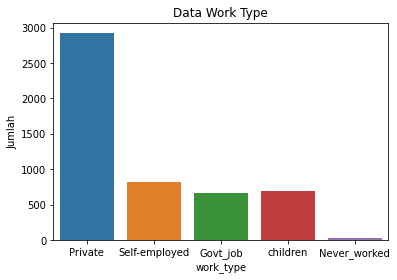

In [ ]:
import seaborn as sns
sns.countplot(df['work_type'])
plt.title('Data Work Type')
plt.ylabel("Jumlah")


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Jumlah')

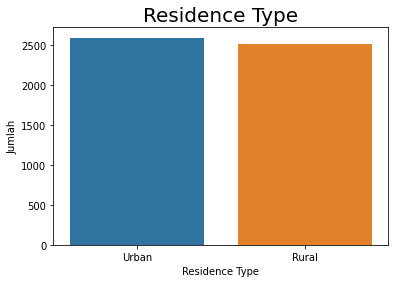

In [ ]:
#membuat grafik berdasarkan kolom work_type
sns.countplot(df['Residence_type'])
plt.title('Residence Type',fontsize=20)
plt.xlabel('Residence Type')
plt.ylabel("Jumlah")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


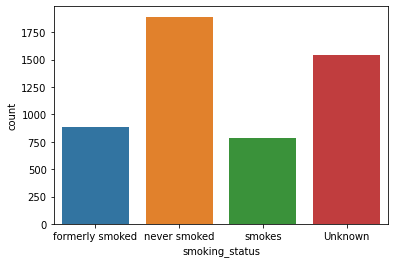

In [ ]:
sns.countplot(df['smoking_status'])

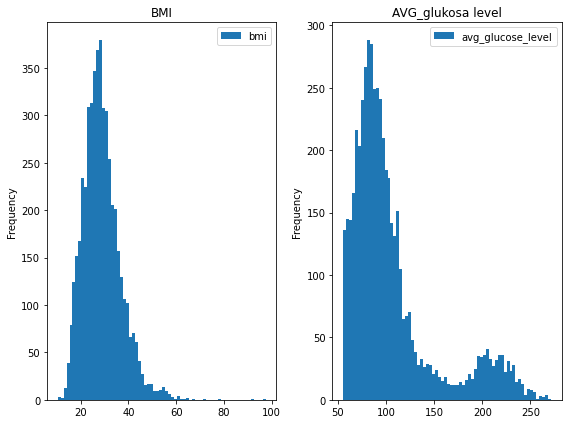

In [ ]:
fig, axes= plt.subplots(1,2,figsize=(8,6))
df.plot(kind='hist',y='bmi',bins=70,ax=axes[0],title='BMI')
df.plot(kind='hist',y='avg_glucose_level',bins=70,ax=axes[1], title="AVG_glukosa level")
fig.tight_layout()


#Data Preprocessing

1. Convert data (jika perlu) -- drop id number, change children to never worked
2. Change text to binary misalnya smoking status, gender,dll - One Hot Encoder
3. Standarisasi data numerical (coba ditanya)
4. Replicate data
5. Pisahkan data train dan test
x_test x_train y_test y_train

In [15]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1


In [16]:
#menghilangkan collomns id karena tidak berpengaruh pada penyusunan model  
df.drop(columns='id',inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1


In [18]:
#melihat sumery kolom work type
Counter(df['work_type'])

Counter({'Govt_job': 657,
         'Never_worked': 22,
         'Private': 2924,
         'Self-employed': 819,
         'children': 687})

In [19]:
#replace value children menjadi Never_worked
df.replace(to_replace='children',value='Never_worked',inplace=True)

In [20]:
Counter(df['work_type'])

Counter({'Govt_job': 657,
         'Never_worked': 709,
         'Private': 2924,
         'Self-employed': 819})

In [21]:
df=pd.get_dummies(df)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.60000,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.89456,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0
2,80.0,0,1,105.92,32.50000,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.40000,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.00000,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0


In [25]:
X=df.drop(['stroke'],1)
y=df['stroke']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)

In [30]:
print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())

       age  hypertension  ...  smoking_status_never smoked  smoking_status_smokes
1547  59.0             0  ...                            0                      0
4976  18.0             0  ...                            0                      0
246   75.0             0  ...                            0                      0
2824  41.0             0  ...                            1                      0
3799  40.0             0  ...                            1                      0

[5 rows x 19 columns]
1547    0
4976    0
246     1
2824    0
3799    0
Name: stroke, dtype: int64
       age  hypertension  ...  smoking_status_never smoked  smoking_status_smokes
42    82.0             0  ...                            0                      1
380    4.0             0  ...                            0                      0
1559  53.0             0  ...                            0                      0
352   20.0             0  ...                            1                      